Aim: To develop a fuzzy system for predicting tips to be given for a hotel service based on fuzzy variables service and food quality
==

In [1]:
!pip install scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [3]:
quality = ctrl.Antecedent(np.arange(0,11,1),'quality')
quality

Antecedent: quality

In [4]:
service = ctrl.Antecedent(np.arange(0,11,1),'service')


In [5]:
tip = ctrl.Consequent(np.arange(0,26,1),'tip')


In [6]:
quality.automf(3)   #mf = membership_function 3 = poor,average,good


In [7]:
service.automf(3)


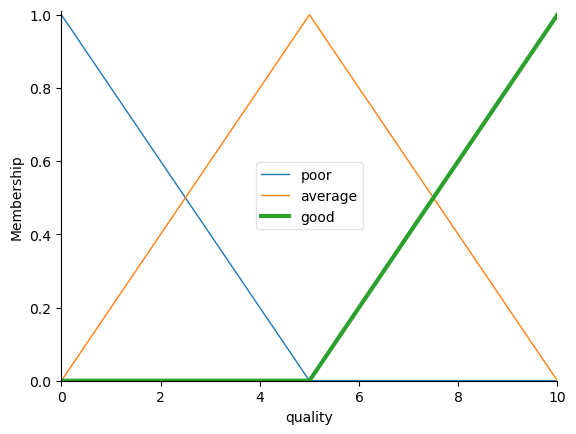

In [8]:
quality['good'].view()


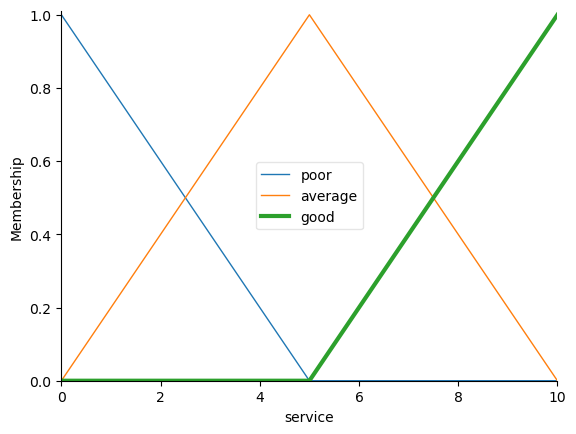

In [9]:
service['good'].view()


In [10]:
tip['low'] = fuzz.trimf(tip.universe,[0,0,13])        #trimf = triangular membership function
tip['medium'] = fuzz.trimf(tip.universe,[0,13,25])
tip['high'] = fuzz.trimf(tip.universe,[13,25,25])

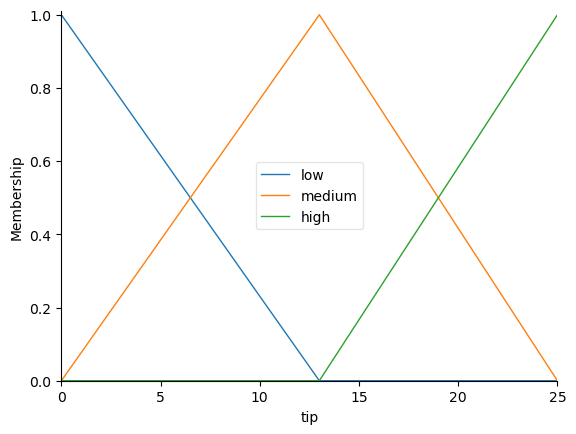

In [11]:
tip.view()


In [12]:
rule1 = ctrl.Rule(quality['poor']|service['poor'],tip['low'])
rule2 = ctrl.Rule(quality['average']|service['average'],tip['medium'])
rule3 = ctrl.Rule(quality['good']|service['good'],tip['high'])

In [13]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])


In [14]:
tipping_system = ctrl.ControlSystemSimulation(tipping_ctrl)


In [16]:
tipping_system.input['quality'] = 6.5   #6.5 = crisp value
tipping_system.input['service'] = 9.8
tipping_system.compute()

In [17]:
tipping_system.output['tip']


14.79822137450634